# Sentiment Classification with Natural Language Processing on LSTM

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

##### Data includes:
Reviews from Oct 1999 - Oct 2012,

568,454 reviews

256,059 users

74,258 products

In this project, I will be analysing 10,000 reviews.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### One time activity

In [2]:
# read the data
df = pd.read_csv('Reviews.csv')

In [3]:
df.shape

(568454, 10)

In [4]:
#exctracting the required data from original data 
# finding the shape of the data
df = df[:10000]
df.shape

(10000, 10)

In [5]:
df.to_csv('Final_reviews.csv')

### Data frame making and analysing

In [8]:
df = pd.read_csv('Final_reviews.csv')

In [9]:
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df.shape

(10000, 11)

In [11]:
#info about all the columns of data 
df.dtypes

Unnamed: 0                 int64
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

## Text cleaning or pre-processing

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 10000):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [14]:
corpus=pd.DataFrame(corpus, columns=['Reviews']) 
corpus.head()

,Reviews
0,bought sever vital can dog food product found ...
1,product arriv label jumbo salt peanut peanut a...
2,confect around centuri light pillowi citru gel...
3,look secret ingredi robitussin believ found go...
4,great taffi great price wide assort yummi taff...


In [15]:
result=corpus.join(df[['Score']])
result.head()

,Reviews,Score
0,bought sever vital can dog food product found ...,5
1,product arriv label jumbo salt peanut peanut a...,1
2,confect around centuri light pillowi citru gel...,4
3,look secret ingredi robitussin believ found go...,2
4,great taffi great price wide assort yummi taff...,5


## TFIDF

TFIDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(result['Reviews'])

TfidfVectorizer()

In [17]:
X = tfidf.transform(result['Reviews'])
result['Reviews'][1]

'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo'

In [18]:
print([X[1, tfidf.vocabulary_['peanut']]])

[0.37509695630835344]


In [19]:
print([X[1, tfidf.vocabulary_['jumbo']]])

[0.5727828521365451]


In [20]:
print([X[1, tfidf.vocabulary_['error']]])

[0.2706003734708304]


Among the three words, “peanut”, “jumbo” and “error”, tf-idf gives the highest weight to “jumbo”. Why? This indicates that “jumbo” is a much rarer word than “peanut” and “error”. This is how to use the tf-idf to indicate the importance of words or terms inside a collection of documents.



## Sentiment Classification

In [21]:
result.dropna(inplace=True)
result[result['Score'] != 3]
result['Positivity'] = np.where(result['Score'] > 3, 1, 0)
cols = [ 'Score']
result.drop(cols, axis=1, inplace=True)
result.head()

,Reviews,Positivity
0,bought sever vital can dog food product found ...,1
1,product arriv label jumbo salt peanut peanut a...,0
2,confect around centuri light pillowi citru gel...,1
3,look secret ingredi robitussin believ found go...,0
4,great taffi great price wide assort yummi taff...,1


In [22]:
result.groupby('Positivity').size()

Positivity
0    2384
1    7616
dtype: int64

## Splitting the Data : Train-test

In [23]:
from sklearn.model_selection import train_test_split
X = result.Reviews
y = result.Positivity
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [24]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 7500 entries with 23.57% negative, 76.43% positive


In [25]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 2500 entries with 24.64% negative, 75.36% positive


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [27]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [28]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,5000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [30]:
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(class_weight='balanced')


Test result for 10000 features
accuracy score: 84.28%
Test result for 15000 features
accuracy score: 83.80%
Test result for 20000 features
accuracy score: 83.44%
Test result for 25000 features
accuracy score: 82.80%
Test result for 30000 features
accuracy score: 83.52%


In [31]:
from sklearn.metrics import classification_report

cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print("The accuracy score for CV as vectorizer" + str(accuracy_score( y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=['negative','positive']))

The accuracy score for CV as vectorizer0.8284
              precision    recall  f1-score   support

    negative       0.92      0.33      0.49       616
    positive       0.82      0.99      0.90      1884

    accuracy                           0.83      2500
   macro avg       0.87      0.66      0.69      2500
weighted avg       0.84      0.83      0.80      2500



In [32]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipeline, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.84 (+/- 0.02)


## Chi2 feature selection

In [33]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(result.Reviews)
y = result.Positivity
chi2score = chi2(X_tfidf, y)[0]

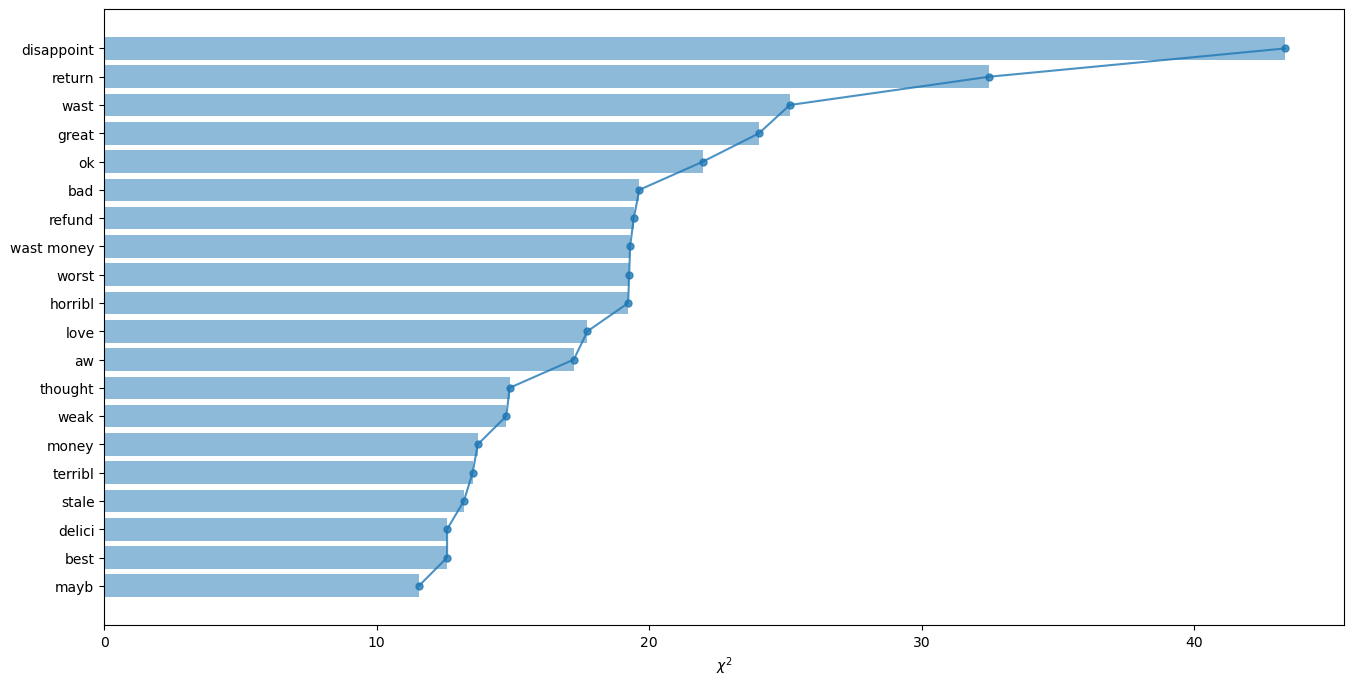

In [35]:

plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names_out(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

##LSTM Neural Network

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import SpatialDropout1D
import re

In [39]:
#30
max_fatures = 30000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(result['Reviews'].values)
X1 = tokenizer.texts_to_sequences(result['Reviews'].values)
X1 = pad_sequences(X1)

In [40]:
#31
Y1 = pd.get_dummies(result['Positivity']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

(7500, 932) (7500, 2)
(2500, 932) (2500, 2)


## Embedding Layer

In [41]:
#32
embed_dim = 100
lstm_out = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(200, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 932, 100)          3000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 932, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200)               240800    
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
Total params: 3,241,202
Trainable params: 3,241,202
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
#33
batch_size = 32
model.fit(X1_train, Y1_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
235/235 - 1049s - loss: 0.3076 - accuracy: 0.8677 - 1049s/epoch - 4s/step
Epoch 2/10
235/235 - 1043s - loss: 0.2109 - accuracy: 0.9183 - 1043s/epoch - 4s/step
Epoch 3/10
235/235 - 1068s - loss: 0.1415 - accuracy: 0.9496 - 1068s/epoch - 5s/step
Epoch 4/10
235/235 - 1060s - loss: 0.0894 - accuracy: 0.9688 - 1060s/epoch - 5s/step
Epoch 5/10
235/235 - 1042s - loss: 0.0612 - accuracy: 0.9791 - 1042s/epoch - 4s/step
Epoch 6/10
235/235 - 1045s - loss: 0.0598 - accuracy: 0.9801 - 1045s/epoch - 4s/step
Epoch 7/10
235/235 - 1034s - loss: 0.0332 - accuracy: 0.9897 - 1034s/epoch - 4s/step
Epoch 8/10
235/235 - 1024s - loss: 0.0222 - accuracy: 0.9932 - 1024s/epoch - 4s/step
Epoch 9/10
235/235 - 990s - loss: 0.0198 - accuracy: 0.9933 - 990s/epoch - 4s/step
Epoch 10/10
235/235 - 1041s - loss: 0.0181 - accuracy: 0.9949 - 1041s/epoch - 4s/step


In [44]:
#34
score,acc = model.evaluate(X1_test, Y1_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

79/79 - 283s - loss: 0.9167 - accuracy: 0.8352 - 283s/epoch - 4s/step
score: 0.92
acc: 0.84


In [45]:
#35
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 0)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")


pos_acc 91.35932560590095 %
neg_acc 58.80398671096345 %
